<a href="https://colab.research.google.com/github/chindimaga/SHALA2020/blob/master/ML_L1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [229]:
attrition_data.head()

Age  Attrition  ... YearsWithCurrManager  ID
0   41          1  ...                    5   0
1   49          0  ...                    7   1
2   37          1  ...                    0   2
3   33          0  ...                    0   3
4   27          0  ...                    2   4

[5 rows x 34 columns]

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [0]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [231]:
attrition_data.describe()

Age    Attrition  ...  YearsWithCurrManager           ID
count  1028.000000  1028.000000  ...           1028.000000  1028.000000
mean     36.999027     0.167315  ...              4.141051   513.500000
std       9.444297     0.373439  ...              3.608460   296.902341
min      18.000000     0.000000  ...              0.000000     0.000000
25%      30.000000     0.000000  ...              2.000000   256.750000
50%      36.000000     0.000000  ...              3.000000   513.500000
75%      43.000000     0.000000  ...              7.000000   770.250000
max      60.000000     1.000000  ...             17.000000  1027.000000

[8 rows x 27 columns]

In [232]:
attrition_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

There is **no missing data** in this dataset. This is really good news 




In [0]:
X = attrition_data.drop(['Attrition'], axis = 1)
y = attrition_data['Attrition']

0    856
1    172
Name: Attrition, dtype: int64

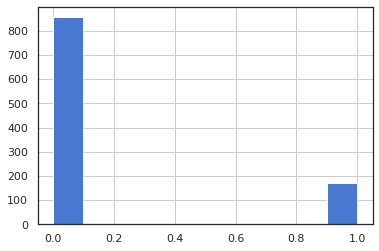

In [234]:
y.hist();
y.value_counts()

# Train Test Split

It is important in machine learning that the model should never have seen the data we test on. So it is important to seperate the data befor applying any inds of transforms or imputations. If we are not doing so, the value we impute may be affected by test data, thus it may reduce the models generelization 

The column Attrition which is also the target variable has a class imbalance. 172 1s and 856 0s. So it is important to **split the data in the stratified way** such that contribution of each class is same in test and train, which is intern similar to the data which can be possibly tested.Since there are only two categories any transform on the data wont help much. 

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print(X_train.shape)

(822, 33)


# EDA

Currently train data has 33 features. Its just a lot to learn. Lets preprocess the data and takeout redundent features  

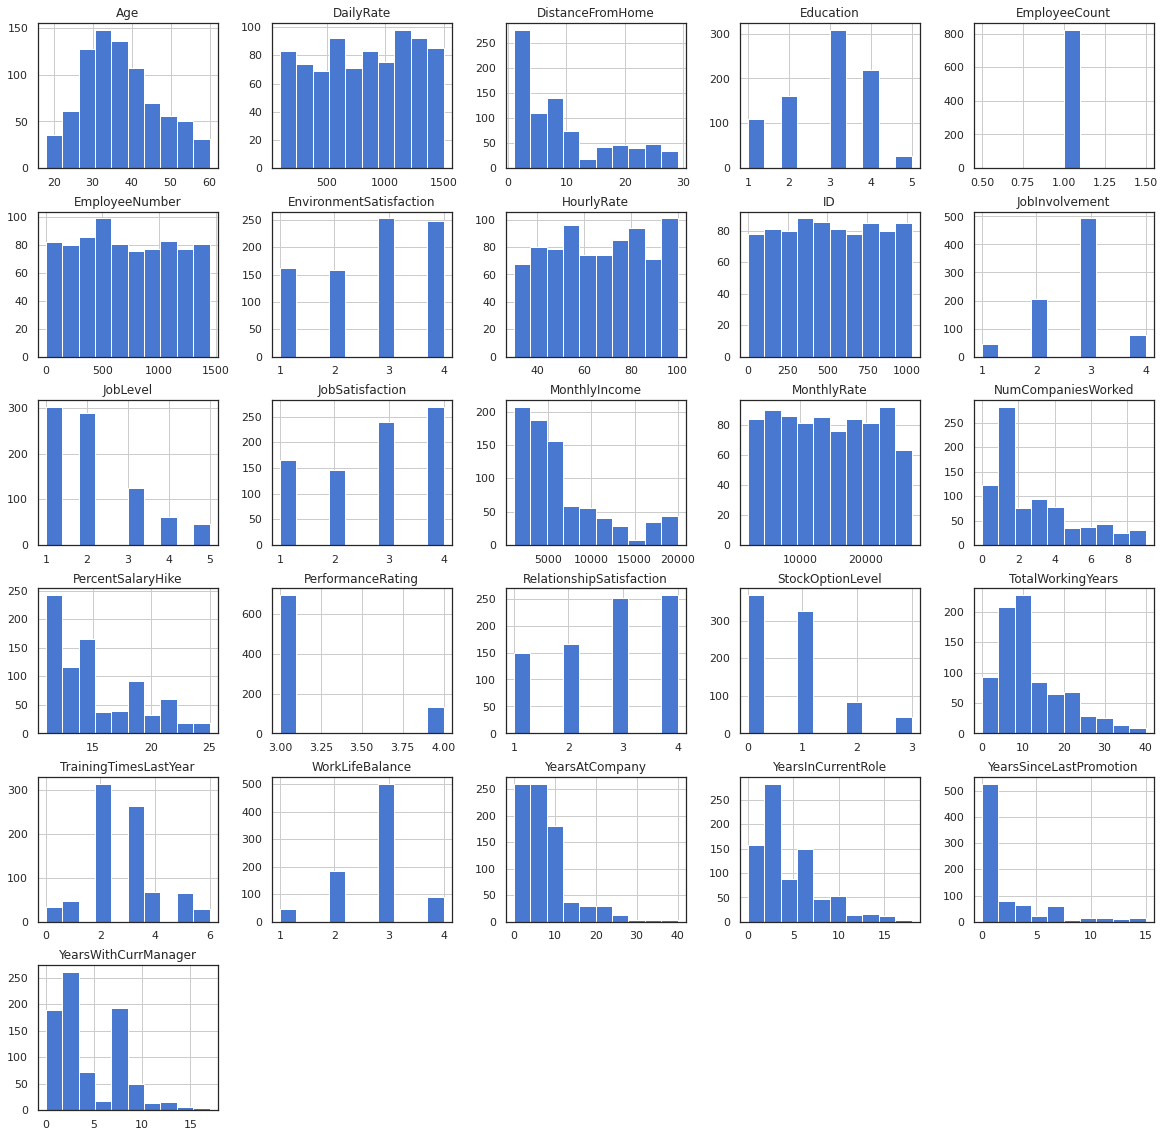

In [236]:
X_train.hist(figsize=(20,20));

In [237]:
X_train.EmployeeCount.value_counts()

1    822
Name: EmployeeCount, dtype: int64

In [238]:
len(X_train.EmployeeNumber.unique())

822

In [239]:
len(X_train.ID.unique())

822

**ID** an **Employee Number** is just unique for every employee and the **employee count** is constantly 1 for all the data points. nad Employee number in future. Dropping employee count now 

In [0]:
X_train = X_train.drop(columns=['EmployeeCount'])

Now lets analyse the  variables one by one
# Analysing Categorical variables


In [0]:
from sklearn import preprocessing
def labeler_test(colname,X,bot):
  X[colname+"_tra"] = bot.transform(X[colname])
  X = X.drop(columns=[colname])
  return X

In [0]:
def labeler(colname,X):
  bot = preprocessing.LabelEncoder()
  bot.fit(X[colname])
  X[colname+"_tra"] = bot.transform(X[colname])
  X = X.drop(columns=[colname])
  return bot , X

In [0]:
def onehotter(colname,X):
  cat = pd.get_dummies(X[colname], prefix=colname)
  X = pd.concat([X, cat], axis=1)
  X = X.drop(columns=[colname])
  return X 

In [0]:
sns.set(style="white", palette="muted", color_codes=True)
def cat_analyse(colname,X,y):
  sns.countplot(x=colname, data=X)
  f, axes = plt.subplots(0,1, figsize=(7, 7), sharex=True)
  sns.despine(left=True)
  ct = pd.crosstab( X[colname],y)
  print("="*120)
  print('Before')
  print(ct)
  print("="*120)
  ct.plot.bar()
  ct_new = ct.copy()
  ct_new[0] = ct_new[0]/ ct[0].sum()
  ct_new[1] = ct_new[1]/ ct[1].sum()
  print(ct_new)
  print("="*120)
  ct_new.plot.bar()

Before
Attrition            0   1
BusinessTravel            
Non-Travel          79   8
Travel_Frequently  120  42
Travel_Rarely      485  88
Attrition                 0         1
BusinessTravel                       
Non-Travel         0.115497  0.057971
Travel_Frequently  0.175439  0.304348
Travel_Rarely      0.709064  0.637681


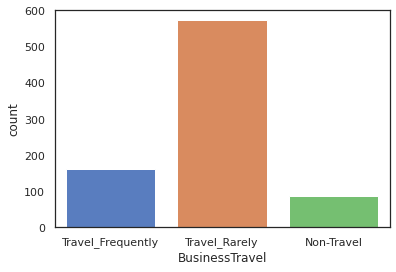

<Figure size 504x504 with 0 Axes>

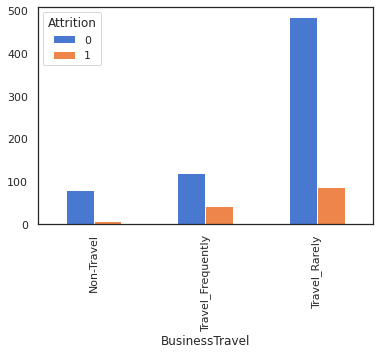

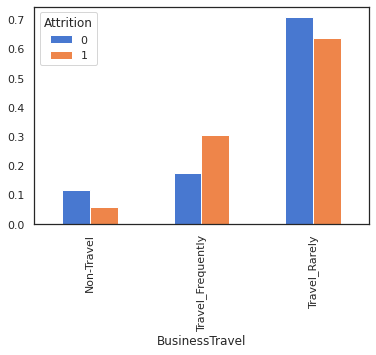

In [245]:
cat_analyse("BusinessTravel",X_train,y_train)

Now we hava a better over view on the data

No clear conclusions but will help the model.For Business Travel Label encoder can be used as its more or less ordinal categories.

In [0]:
X_train = onehotter('BusinessTravel',X_train)

Before
Attrition                 0   1
Department                     
Human Resources          24   4
Research & Development  453  86
Sales                   207  48
Attrition                      0         1
Department                                
Human Resources         0.035088  0.028986
Research & Development  0.662281  0.623188
Sales                   0.302632  0.347826


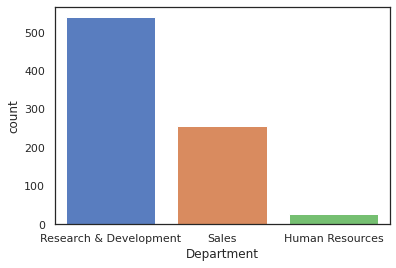

<Figure size 504x504 with 0 Axes>

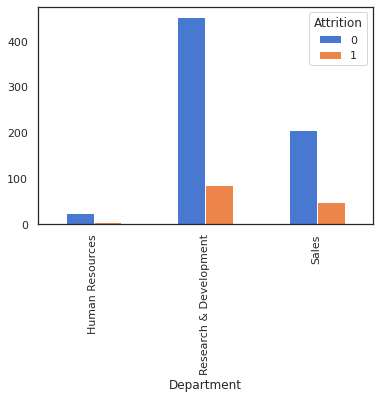

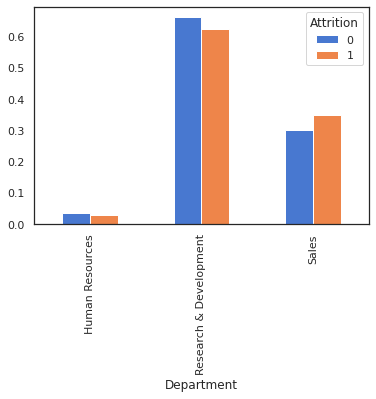

In [247]:
cat_analyse("Department",X_train,y_train)

No clear conclusions but will help the model. For Department one 

---

hot encoding can be preferred.  

In [0]:
X_train = onehotter("Department",X_train)

Before
Attrition           0   1
EducationField           
Human Resources    10   2
Life Sciences     288  55
Marketing          78  18
Medical           216  36
Other              36   9
Technical Degree   56  18
Attrition                0         1
EducationField                      
Human Resources   0.014620  0.014493
Life Sciences     0.421053  0.398551
Marketing         0.114035  0.130435
Medical           0.315789  0.260870
Other             0.052632  0.065217
Technical Degree  0.081871  0.130435


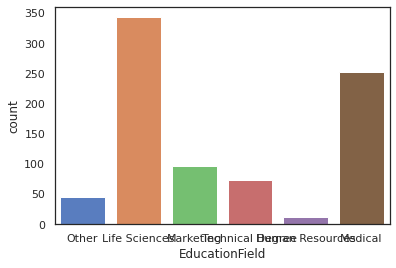

<Figure size 504x504 with 0 Axes>

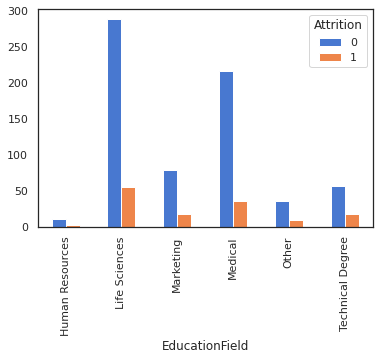

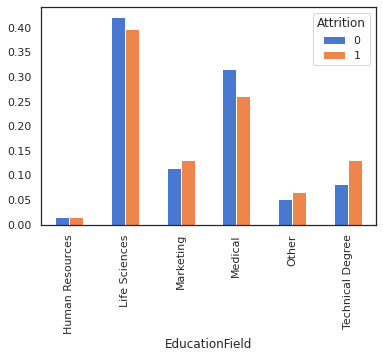

In [249]:
cat_analyse("EducationField",X_train,y_train)

No clear conclusions but will help the model. For EducationField one hot encoding will raise the number of parameters a lot. And this is not helping a lot. SO   

In [0]:
educ, X_train = labeler("EducationField",X_train)

Before
Attrition    0   1
Gender            
Female     292  53
Male       392  85
Attrition         0         1
Gender                       
Female     0.426901  0.384058
Male       0.573099  0.615942


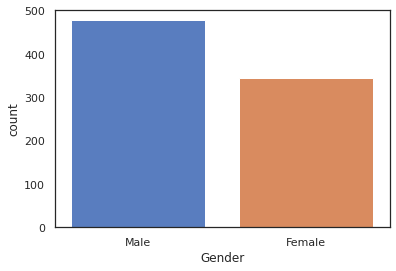

<Figure size 504x504 with 0 Axes>

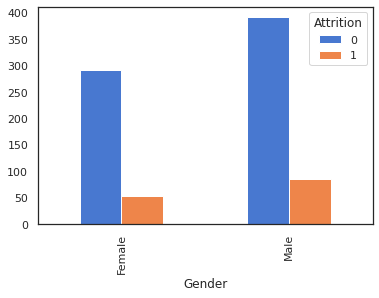

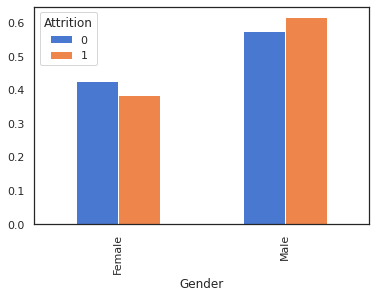

In [251]:
cat_analyse("Gender",X_train,y_train)

No conclusive information

In [0]:
gend, X_train = labeler("Gender",X_train)

Before
Attrition                    0   1
JobRole                           
Healthcare Representative   62   7
Human Resources             18   4
Laboratory Technician      106  37
Manager                     59   4
Manufacturing Director      73   5
Research Director           49   2
Research Scientist         133  33
Sales Executive            155  29
Sales Representative        29  17
Attrition                         0         1
JobRole                                      
Healthcare Representative  0.090643  0.050725
Human Resources            0.026316  0.028986
Laboratory Technician      0.154971  0.268116
Manager                    0.086257  0.028986
Manufacturing Director     0.106725  0.036232
Research Director          0.071637  0.014493
Research Scientist         0.194444  0.239130
Sales Executive            0.226608  0.210145
Sales Representative       0.042398  0.123188


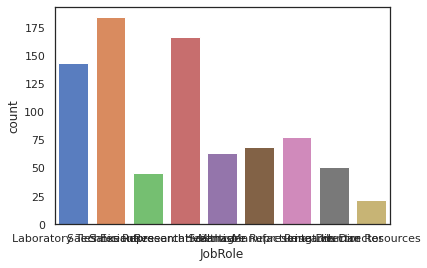

<Figure size 504x504 with 0 Axes>

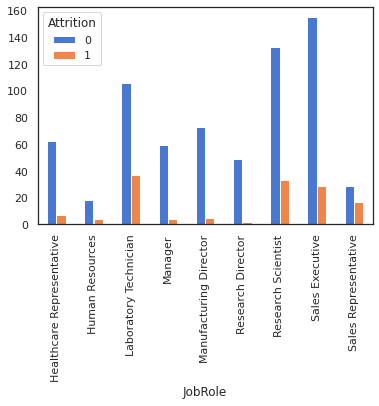

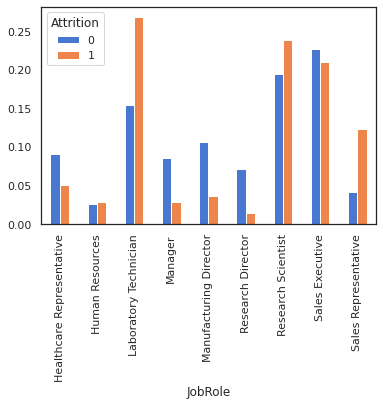

In [253]:
cat_analyse("JobRole",X_train,y_train)

Chances are high if you are a sales rep(relativly) , lab technician . Research scientist and sales executives are next in the line.

In [0]:
X_train = onehotter("JobRole",X_train)

Before
Attrition        0   1
MaritalStatus         
Divorced       166  19
Married        317  47
Single         201  72
Attrition            0         1
MaritalStatus                   
Divorced       0.24269  0.137681
Married        0.46345  0.340580
Single         0.29386  0.521739


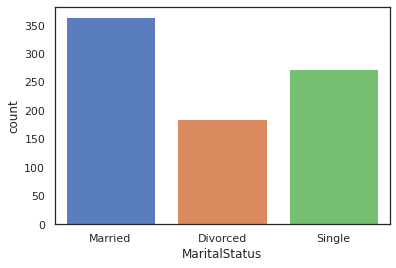

<Figure size 504x504 with 0 Axes>

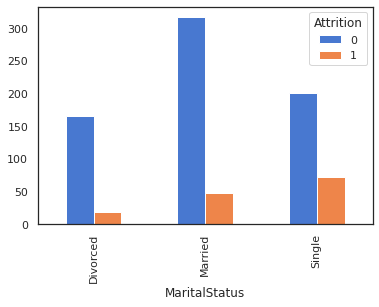

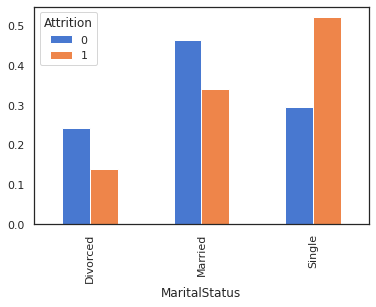

In [255]:
cat_analyse("MaritalStatus",X_train,y_train)

Single people are likly to be attriterated. Distribution is similar for divorced and married. so lets just see if the guy is single or not. So label encoder

In [0]:
mari, X_train = labeler("MaritalStatus",X_train)

Before
Attrition    0   1
OverTime          
No         521  62
Yes        163  76
Attrition         0         1
OverTime                     
No         0.761696  0.449275
Yes        0.238304  0.550725


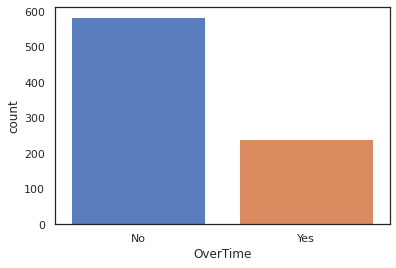

<Figure size 504x504 with 0 Axes>

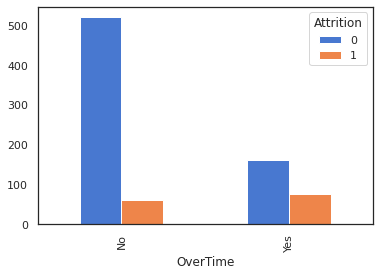

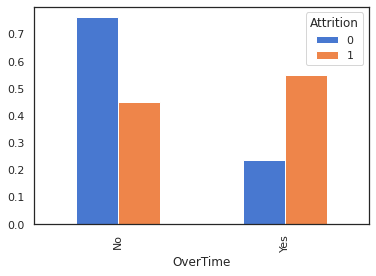

In [257]:
cat_analyse("OverTime",X_train,y_train)

In [0]:
over, X_train = labeler("OverTime",X_train)

People doing overtime has more chances of attrition. Label encoding for this

# Numerical variables

In [0]:
train_data = X_train.copy()
train_data['target'] = y_train

In [110]:
sns.pairplot(train_data, hue = 'target', corner=True)

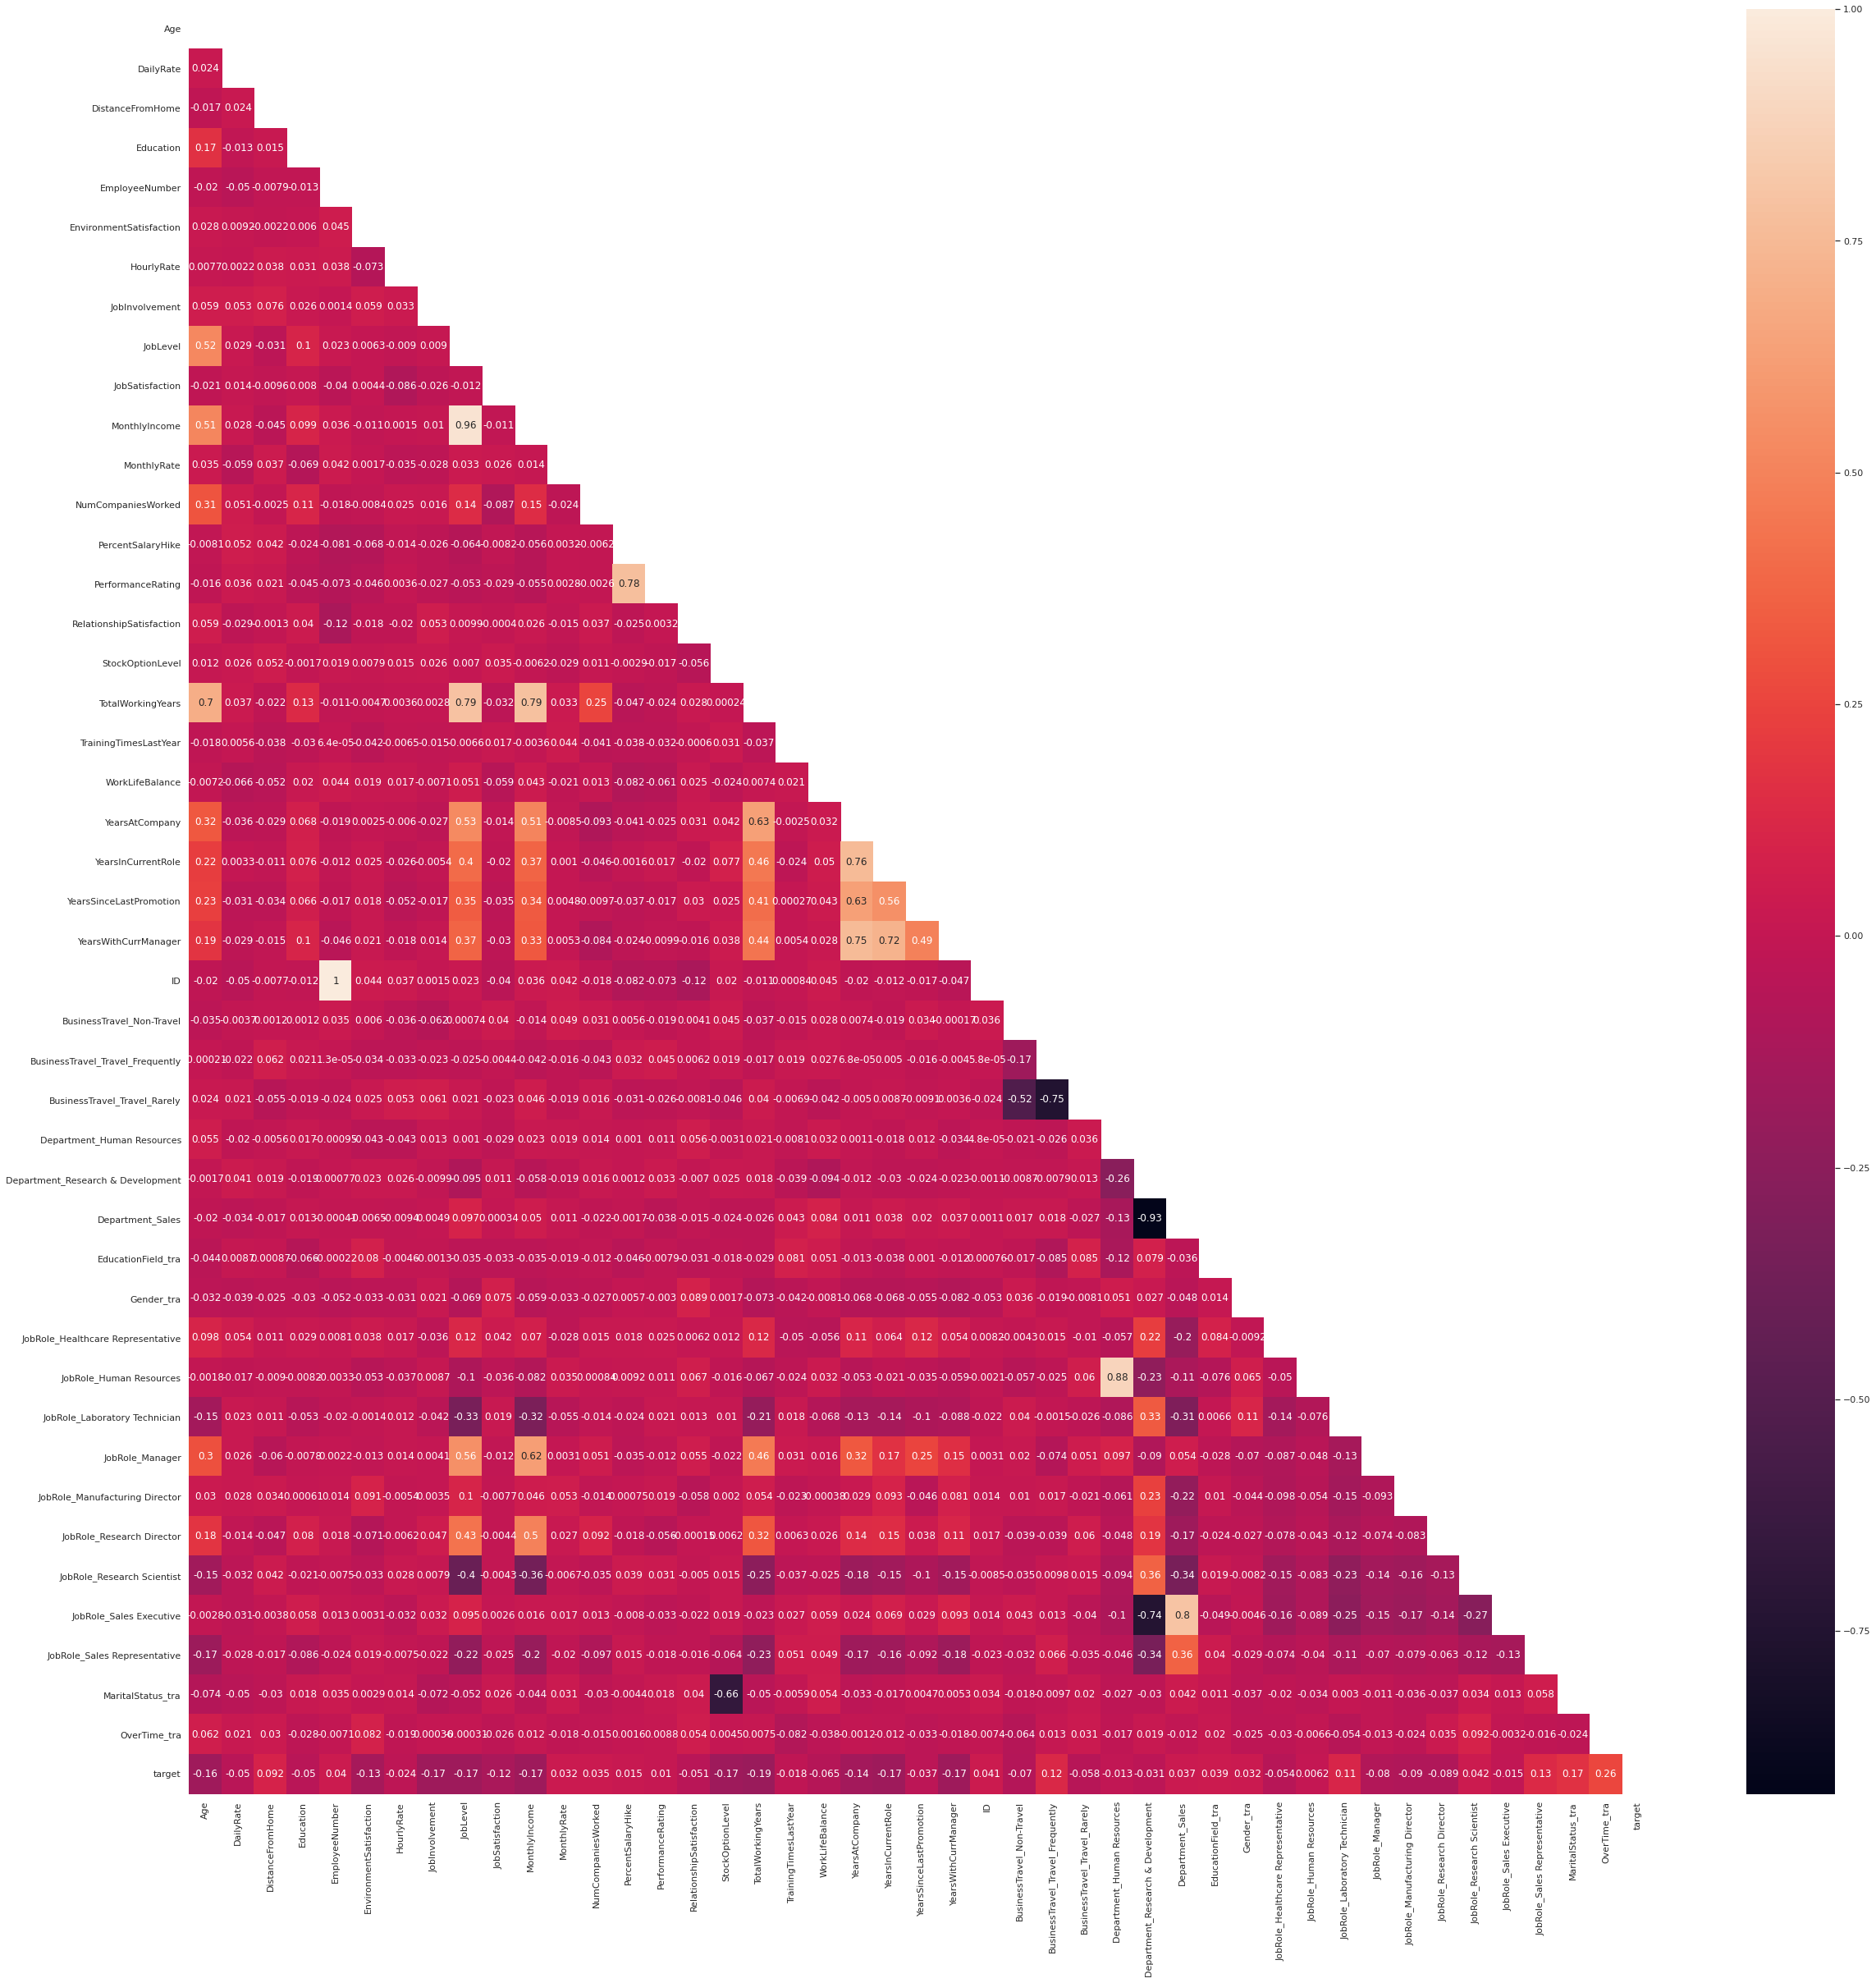

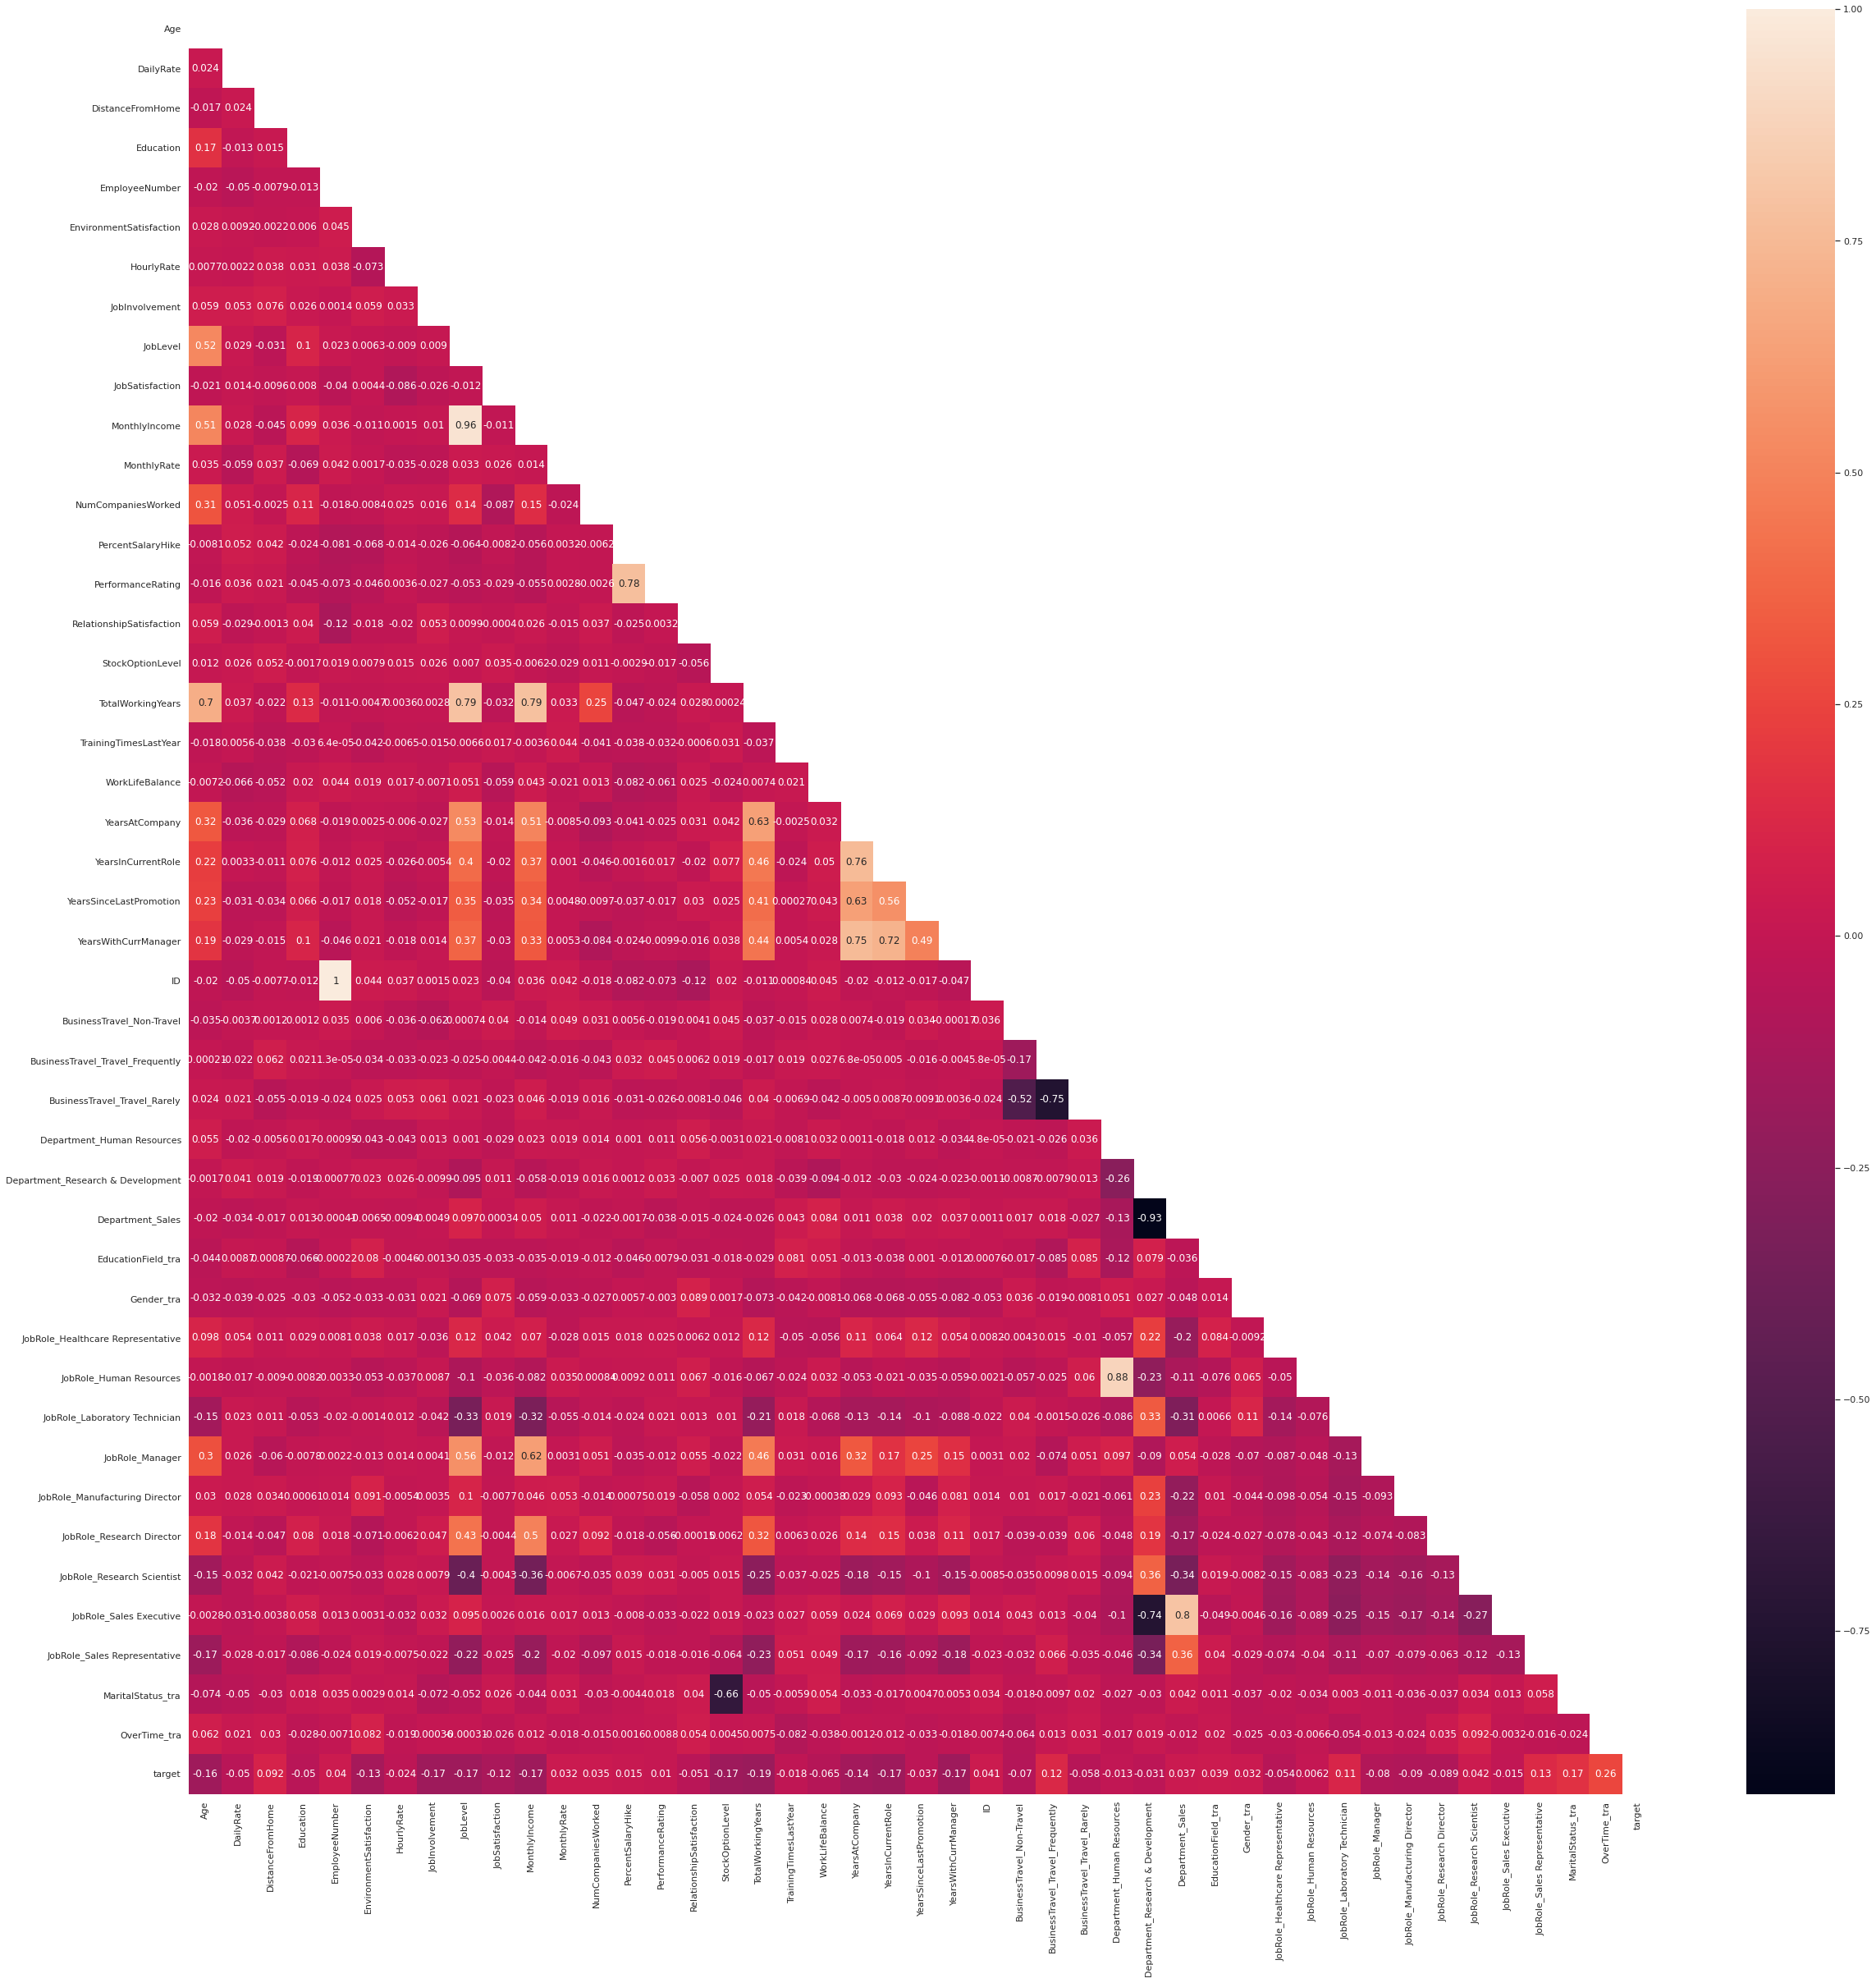

In [260]:
corr = train_data.corr()
plt.figure(figsize=(40,40))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr,mask=mask, annot=True)

Using Lasso regression to see which features are important 

In [0]:
cols = (train_data.drop(columns=['target']).columns).tolist()

In [0]:
from sklearn import linear_model
from sklearn.inspection import permutation_importance
from sklearn import preprocessing 
Standardisation = preprocessing.StandardScaler()
# define the model
model = linear_model.Lasso(alpha=0.0, max_iter=10000)
# fit the model
xd = train_data.drop(columns=['target']).iloc[:, :].values
xstd = Standardisation.fit_transform(xd)

Feature: Age, Score: -0.03567
Feature: DailyRate, Score: -0.01171
Feature: DistanceFromHome, Score: 0.03378
Feature: Education, Score: 0.00126
Feature: EmployeeNumber, Score: -0.77703
Feature: EnvironmentSatisfaction, Score: -0.05191
Feature: HourlyRate, Score: -0.01198
Feature: JobInvolvement, Score: -0.05220
Feature: JobLevel, Score: 0.04972
Feature: JobSatisfaction, Score: -0.04283
Feature: MonthlyIncome, Score: -0.02384
Feature: MonthlyRate, Score: 0.01707
Feature: NumCompaniesWorked, Score: 0.04325
Feature: PercentSalaryHike, Score: 0.00688
Feature: PerformanceRating, Score: -0.01012
Feature: RelationshipSatisfaction, Score: -0.02786
Feature: StockOptionLevel, Score: -0.03623
Feature: TotalWorkingYears, Score: -0.05401
Feature: TrainingTimesLastYear, Score: -0.00408
Feature: WorkLifeBalance, Score: -0.02584
Feature: YearsAtCompany, Score: 0.03944
Feature: YearsInCurrentRole, Score: -0.04415
Feature: YearsSinceLastPromotion, Score: 0.04546
Feature: YearsWithCurrManager, Score: -0.0

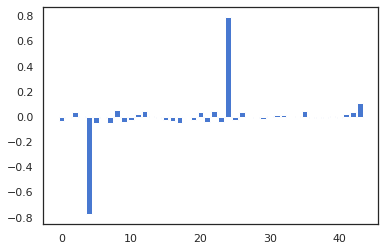

In [266]:
model.fit(xstd,y_train)
# get importance
importance = model.coef_
# summarize feature importance
imp_col=[]
for i,v in enumerate(importance):
	if abs(v) > 0.03:
		imp_col.append(cols[i])
	print('Feature: %s, Score: %.5f' % (cols[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

For some reason , the employee number and ID is affecting the classification a lot. This may be some kind of error or a corelltion  

In [262]:
len(imp_col)

19

In [263]:
imp_col

['Age',
 'DistanceFromHome',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'ID',
 'BusinessTravel_Travel_Frequently',
 'JobRole_Laboratory Technician',
 'MaritalStatus_tra',
 'OverTime_tra']

In [0]:
trainf = train_data[imp_col]

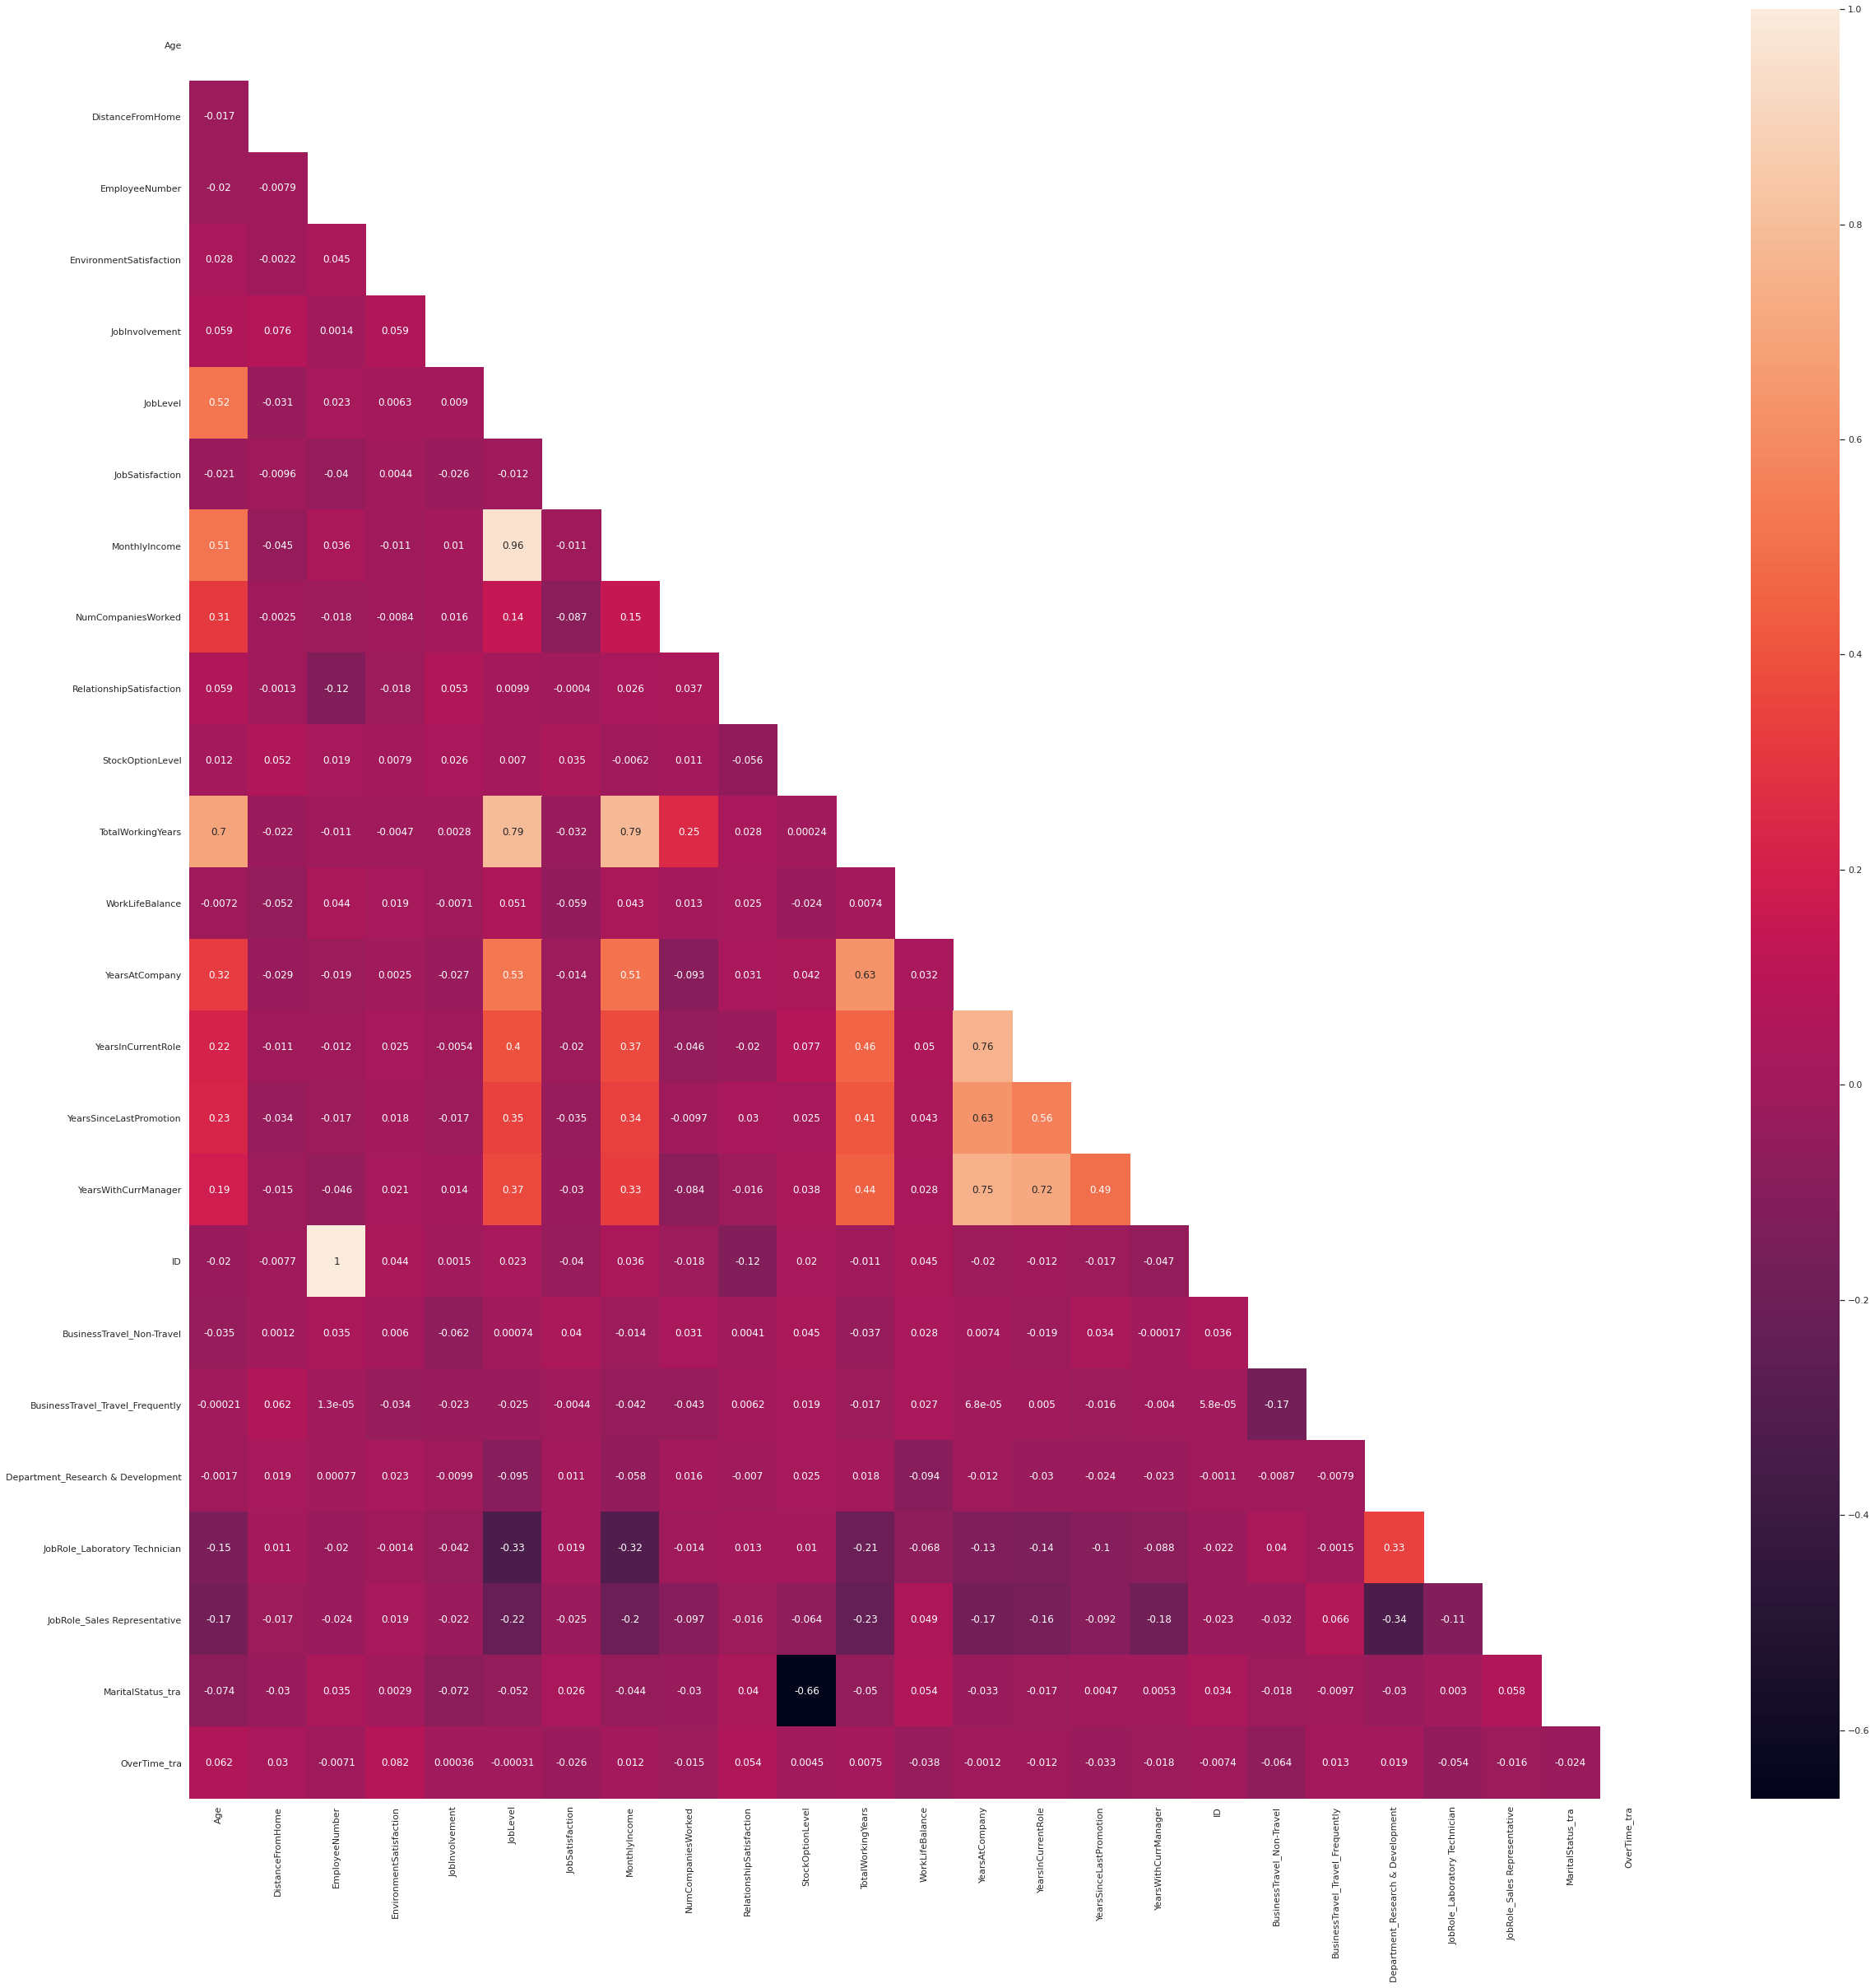

In [192]:
corr = trainf.corr()
plt.figure(figsize=(40,40))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr,mask=mask, annot=True)

Feature: 0, Score: 0.09625
Feature: 1, Score: 0.06735
Feature: 2, Score: 0.04470
Feature: 3, Score: 0.04574
Feature: 4, Score: 0.04746
Feature: 5, Score: 0.01496
Feature: 6, Score: 0.03628
Feature: 7, Score: 0.12035
Feature: 8, Score: 0.04669
Feature: 9, Score: 0.03052
Feature: 10, Score: 0.04110
Feature: 11, Score: 0.06621
Feature: 12, Score: 0.02519
Feature: 13, Score: 0.04693
Feature: 14, Score: 0.02508
Feature: 15, Score: 0.02984
Feature: 16, Score: 0.02785
Feature: 17, Score: 0.04319
Feature: 18, Score: 0.00531
Feature: 19, Score: 0.01988
Feature: 20, Score: 0.00887
Feature: 21, Score: 0.01157
Feature: 22, Score: 0.00714
Feature: 23, Score: 0.02109
Feature: 24, Score: 0.07047


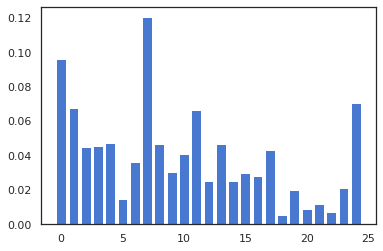

In [196]:
# define the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# fit the model
model.fit(trainf,y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [199]:
imp_col[18]

'YearsSinceLastPromotion'

Feature: 0, Score: 0.04311
Feature: 1, Score: 0.03852
Feature: 2, Score: 0.02893
Feature: 3, Score: 0.04415
Feature: 4, Score: 0.06049
Feature: 5, Score: 0.03264
Feature: 6, Score: 0.04648
Feature: 7, Score: 0.07357
Feature: 8, Score: 0.03294
Feature: 9, Score: 0.03113
Feature: 10, Score: 0.08052
Feature: 11, Score: 0.03249
Feature: 12, Score: 0.03728
Feature: 13, Score: 0.05360
Feature: 14, Score: 0.04676
Feature: 15, Score: 0.03215
Feature: 16, Score: 0.02676
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.03049
Feature: 19, Score: 0.03623
Feature: 20, Score: 0.02576
Feature: 21, Score: 0.02878
Feature: 22, Score: 0.02520
Feature: 23, Score: 0.02442
Feature: 24, Score: 0.08759


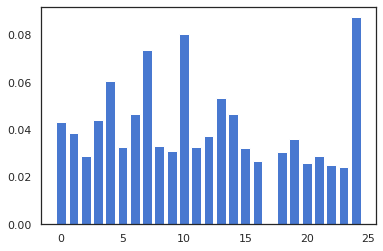

In [197]:
from xgboost import XGBClassifier

model = XGBClassifier()
# fit the model
model.fit(trainf,y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.06509
Feature: 1, Score: 0.05653
Feature: 2, Score: 0.05770
Feature: 3, Score: 0.01760
Feature: 4, Score: 0.00763
Feature: 5, Score: 0.01448
Feature: 6, Score: 0.02034
Feature: 7, Score: 0.02327
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.02266
Feature: 10, Score: 0.10999
Feature: 11, Score: 0.04173
Feature: 12, Score: 0.05270
Feature: 13, Score: 0.01531
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.02212
Feature: 16, Score: 0.05476
Feature: 17, Score: 0.00662
Feature: 18, Score: 0.03170
Feature: 19, Score: 0.02305
Feature: 20, Score: 0.05226
Feature: 21, Score: 0.03267
Feature: 22, Score: 0.00946
Feature: 23, Score: 0.02907
Feature: 24, Score: 0.04971
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00798
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.01327
Feature: 31, Score: 0.04680
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00768
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.01493
Fe

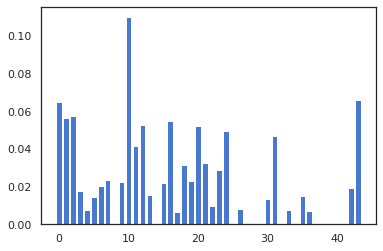

In [114]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

model = DecisionTreeRegressor()
# fit the model
model.fit(train_data.drop(columns=['target']),y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()



1. Droping age as it similar to total years of working(which is more correlated to target)
2. Daily Rate, Education is not that useful. 
3. Dropping hourly rate, monthly rate
2. Performance rating and precent salary hike is also highly related.i drop precent salary hike.
3.   Monthly income and job level are highly correlated. so  drop one of them. i will drop monthly income.
4.  Amoung YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager corelatted highly amoung themesef. So keeping only one
5. Marital status and stock option level has highly negative corelation. so I drop stock option level.
6. ALso dropping Job sales executive and department of research and 
development


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X_train[['YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])
X_pca = pca.transform(X_train[['YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])

In [108]:
y_train.corr(pd.Series(X_pca.reshape((-1))))

-0.006061770717614257

This is not useful. using one of them is better than applying pca to them

In [0]:
train_data = train_data.drop(columns=['Age','ID','EmployeeNumber','YearsSinceLastPromotion','YearsWithCurrManager', 'TotalWorkingYears','MonthlyIncome','PercentSalaryHike', 'Department_Sales','StockOptionLevel','Department_Research & Development','JobRole_Sales Executive'])

In [109]:
train_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'ID',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_tra', 'Gender_tra', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
      

In [267]:
from sklearn import preprocessing 
x = train_data.drop(columns=['target']).iloc[:, :].values 
Standardisation = preprocessing.StandardScaler() 
xstd = Standardisation.fit_transform(x) 
print ("\nAfter Standardisation : \n", xstd) 


After Standardisation : 
 [[-0.21667181 -0.44475796 -0.65420735 ... -0.24347146 -0.14491964
  -0.64027224]
 [ 0.8353319   1.10496966 -0.65420735 ... -0.24347146 -1.49860086
   1.56183563]
 [ 0.0989293  -1.03571422 -0.0429793  ...  4.10725763 -0.14491964
  -0.64027224]
 ...
 [-0.63747329  0.39631257 -1.02094418 ... -0.24347146 -0.14491964
  -0.64027224]
 [-0.32187218  0.71998985 -0.16522491 ... -0.24347146 -0.14491964
  -0.64027224]
 [-1.16347515 -0.10391597  2.40193291 ... -0.24347146 -1.49860086
  -0.64027224]]


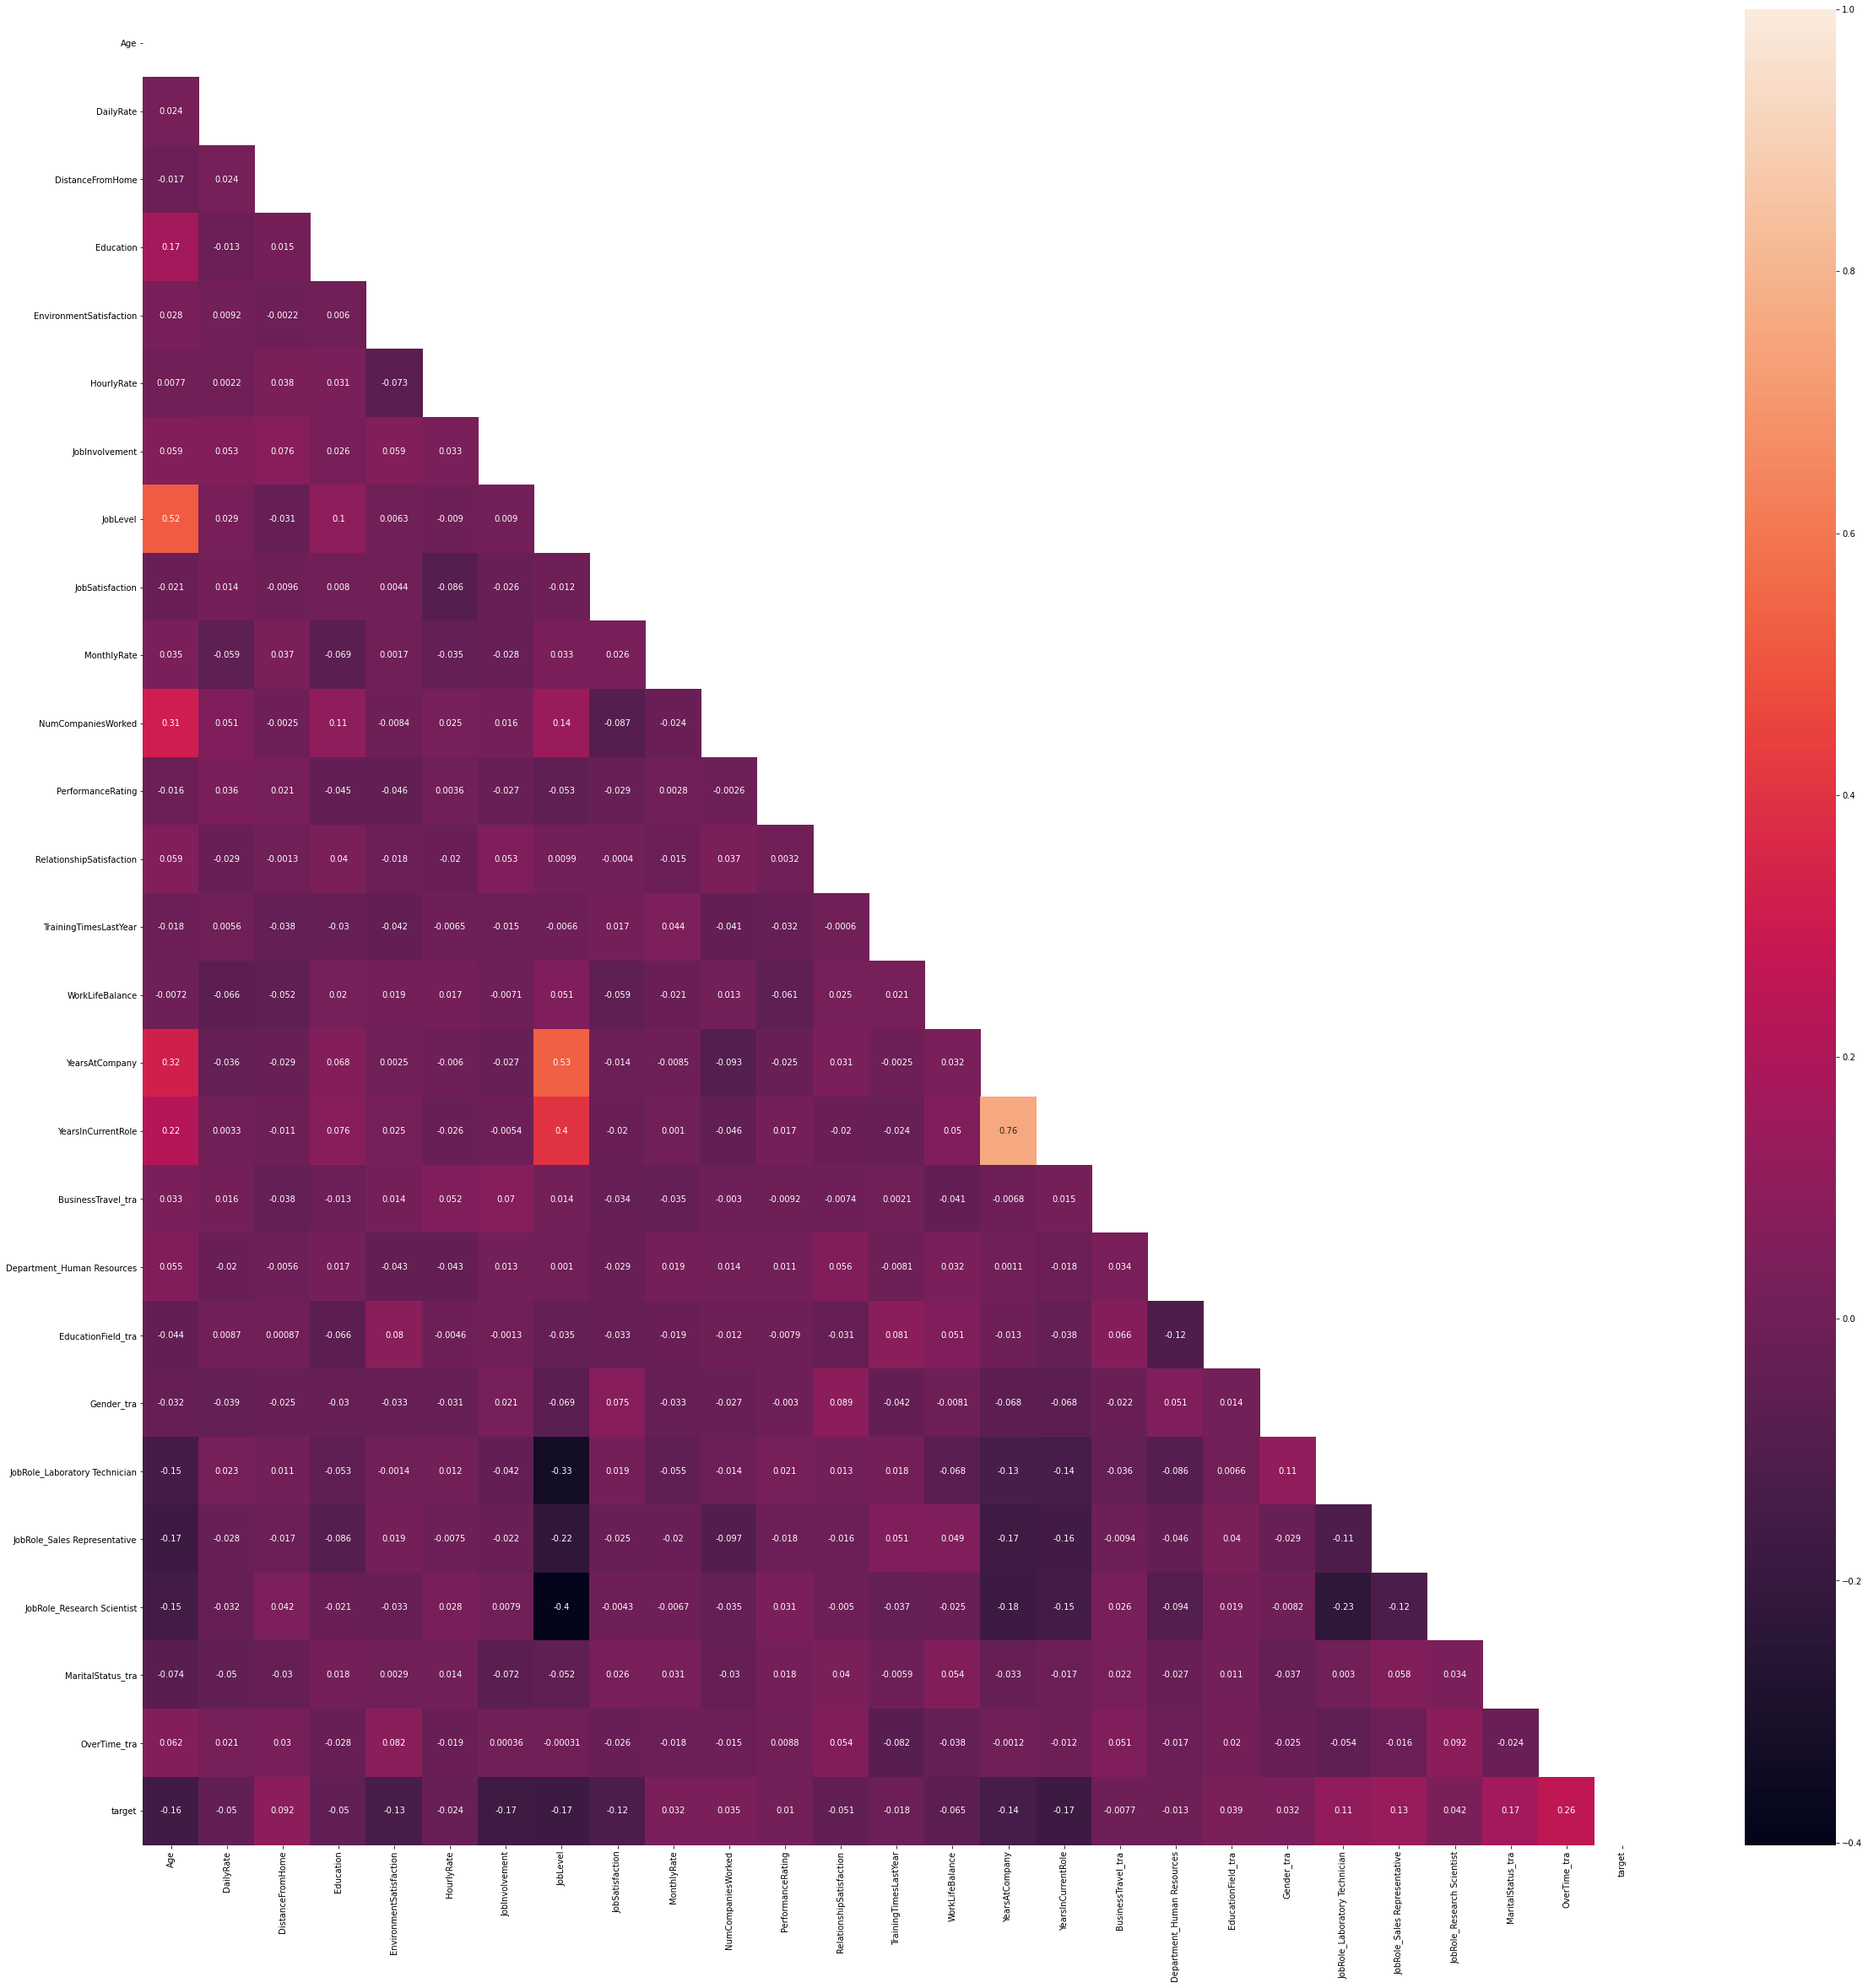

In [0]:
corr = train_data.corr()
plt.figure(figsize=(40,40))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr,mask=mask, annot=True)

In [115]:

# permutation feature importance with knn for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance


model = KNeighborsClassifier()
# fit the model
model.fit(xstd,y_train)
# perform permutation importance
results = permutation_importance(model, xstd,y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

NameError: ignored

## Preparing test data
Applying the same transforms (which was applied to training data)

In [0]:
X_test = X_test.drop(columns=['EmployeeCount'])
X_test = onehotter('BusinessTravel',X_test)
X_test = onehotter("Department",X_test)
X_test = labeler_test("EducationField",X_test,educ)
X_test = labeler_test("Gender",X_test,gend)
X_test = onehotter("JobRole",X_test)
X_test = labeler_test("MaritalStatus",X_test,mari)
X_test = labeler_test("OverTime",X_test,over)

# X_test = X_test.drop(columns=['YearsSinceLastPromotion','YearsWithCurrManager', 'TotalWorkingYears','MonthlyIncome','PercentSalaryHike', 'Department_Sales','StockOptionLevel','Department_Research & Development','JobRole_Sales Executive'])
xd = X_test.iloc[:, :].values
xstd_test = Standardisation.fit_transform(xd) ;

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
plt.style.use('ggplot') 

Trying various algorithems
# Decision Tree

In [0]:
def fit_and_test(name,model,X,y,X_t,y_t):
  # Fit on training data
  model.fit(X,y);
  # Applying classifier on train (seen) set
  predictions = model.predict(X)
  # accuracy score
  accuracy = accuracy_score(y, predictions)
  print('Train accuracy:',np.round(accuracy*100, 2), '%')
  # Applying classifier on test (unseen) set
  predictions = model.predict(X_t)
  # accuracy score
  accuracy = accuracy_score(y_t, predictions)
  print('Test accuracy:',np.round(accuracy*100, 2), '%')
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, predictions))
  print("="*120)
  print("Classification report:",classification_report(y_test, predictions))
  print("="*120)
  probs = model.predict_proba(xstd_test)  
  probs = probs[:, 1]  
  # Calculate roc auc
  roc_value = roc_auc_score(y_t, probs)
  print('The ROC value is ',roc_value)
  fper, tper, thresholds = roc_curve(y_test, probs) 
  plt.plot(fper, tper)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(name+' ROC curve')
  # show the plot
  plt.show()
  return model 

In [287]:
# grid search
max_depth = [3,4,5,6,7]
max_features = [5,7,9,11,13,15,17]
param_grid = dict(max_depth=max_depth, max_features=max_features)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)


grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring="accuracy", n_jobs=-1, cv=kfold,verbose=1)
grid_result = grid_search.fit(xstd, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best: 0.844316 using {'max_depth': 3, 'max_features': 13}


[Parallel(n_jobs=-1)]: Done 172 out of 175 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    0.4s finished


Train accuracy: 85.64 %
Test accuracy: 82.52 %
Confusion Matrix:
[[160  12]
 [ 24  10]]
Classification report:               precision    recall  f1-score   support

           0       0.87      0.93      0.90       172
           1       0.45      0.29      0.36        34

    accuracy                           0.83       206
   macro avg       0.66      0.61      0.63       206
weighted avg       0.80      0.83      0.81       206

The ROC value is  0.6987859097127225


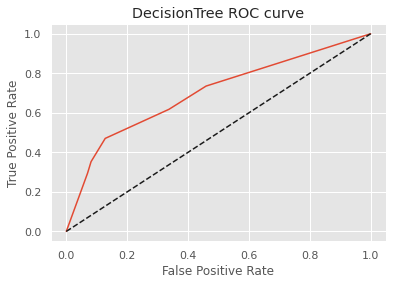

In [288]:
# Make a decision tree and train
DecisionTree = fit_and_test('DecisionTree',
                            DecisionTreeClassifier(max_depth = 3,random_state=123,max_features=13),
                            xstd,y_train,xstd_test,y_test)
# model.fit(xstd, y_train)

In [289]:
print(f'Decision tree has {DecisionTree.tree_.node_count} nodes with maximum depth {DecisionTree.tree_.max_depth}.')

Decision tree has 15 nodes with maximum depth 3.


# XGBoost

In [282]:
n_estimators = [ 500, 600, 700, 800, 900]
learning_rate = [0.003, 0.01, 0.03,0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)


grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold,verbose=1)
grid_result = grid_search.fit(xstd, y_train)

# summarize results
print(); print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   54.0s finished



Best: -0.358880 using {'learning_rate': 0.01, 'n_estimators': 600}


Train accuracy: 91.97 %
Test accuracy: 84.47 %
Confusion Matrix:
[[168   4]
 [ 28   6]]
Classification report:               precision    recall  f1-score   support

           0       0.86      0.98      0.91       172
           1       0.60      0.18      0.27        34

    accuracy                           0.84       206
   macro avg       0.73      0.58      0.59       206
weighted avg       0.81      0.84      0.81       206

The ROC value is  0.765218878248974


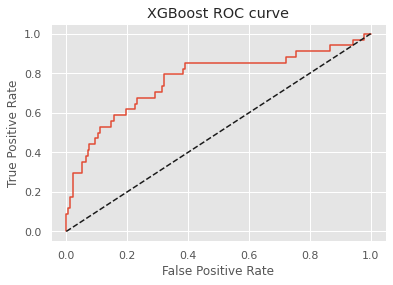

In [285]:
XGB = fit_and_test('XGBoost',
                   XGBClassifier(learning_rate= 0.01, n_estimators= 600),
                   xstd,y_train,xstd_test,y_test)

# Random Forest

In [278]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
model = RandomForestClassifier()

param_grid = { 'max_depth': [4, 6, 8,10,12],'n_estimators': [200,250,300,350]}
search = GridSearchCV(model, param_grid, cv=kfold,n_jobs=-1,scoring="neg_log_loss",verbose=1)
search.fit(xstd, y_train); 
print("Best: %f using %s" % (search.best_score_, search.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.1s finished


Best: -0.368903 using {'max_depth': 12, 'n_estimators': 200}


Train accuracy: 100.0 %
Test accuracy: 85.92 %
Confusion Matrix:
[[171   1]
 [ 28   6]]
Classification report:               precision    recall  f1-score   support

           0       0.86      0.99      0.92       172
           1       0.86      0.18      0.29        34

    accuracy                           0.86       206
   macro avg       0.86      0.59      0.61       206
weighted avg       0.86      0.86      0.82       206

The ROC value is  0.7325581395348838


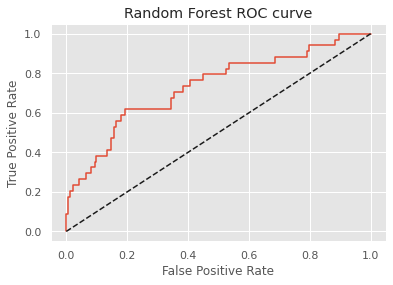

In [279]:
RFC = fit_and_test('Random Forest',
                   RandomForestClassifier(n_estimators=200, max_depth= 12),
                   xstd,y_train,xstd_test,y_test)

# kNN

In [280]:
grid_params = {'n_neighbors':[3,5,11,19],
               'weights':['uniform','distance'],
               'metric':['euclidean','manhatten']}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)               
gs = GridSearchCV(KNeighborsClassifier(),
                  grid_params,
                  verbose=1,
                  cv = kfold,
                  n_jobs=-1)
gs_res = gs.fit(xstd, y_train);
print("Best: %f using %s" % (gs.best_score_, gs.best_params_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best: 0.835772 using {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.5s finished


Train accuracy: 84.79 %
Test accuracy: 83.98 %
Confusion Matrix:
[[171   1]
 [ 32   2]]
Classification report:               precision    recall  f1-score   support

           0       0.84      0.99      0.91       172
           1       0.67      0.06      0.11        34

    accuracy                           0.84       206
   macro avg       0.75      0.53      0.51       206
weighted avg       0.81      0.84      0.78       206

The ROC value is  0.658515731874145


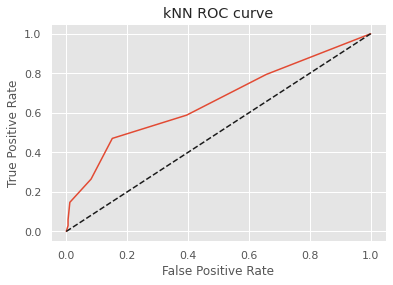

In [281]:
model = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 11, weights= 'uniform')
KNN = fit_and_test('kNN',
                   KNeighborsClassifier(metric= 'euclidean', n_neighbors= 11, weights= 'uniform'),
                   xstd,y_train,xstd_test,y_test)